Logistic Regression – Classification Example

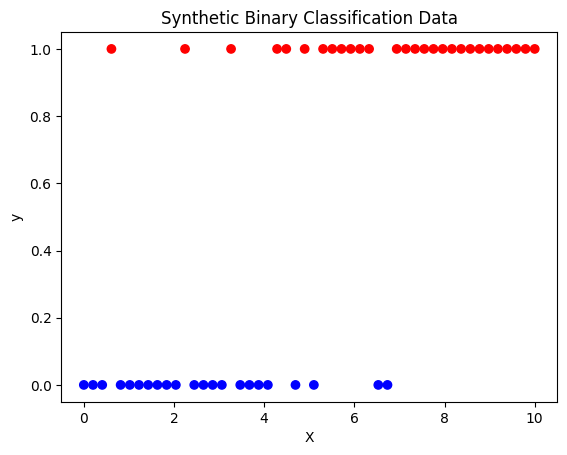

Accuracy: 0.84
Confusion Matrix:
 [[18  4]
 [ 4 24]]


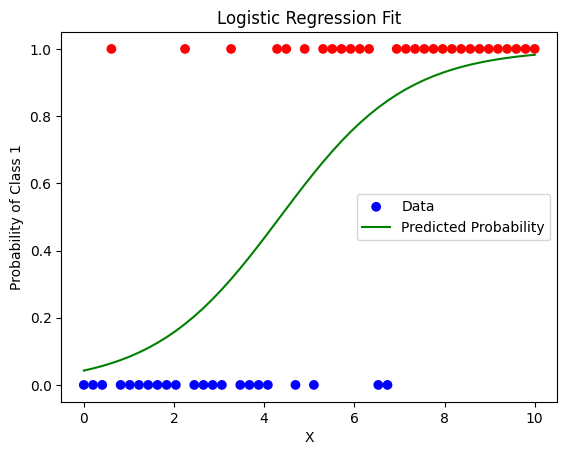

Gradient Descent Logistic Result: b0 = -3.008985458828797 , b1 = 0.6999876641664269


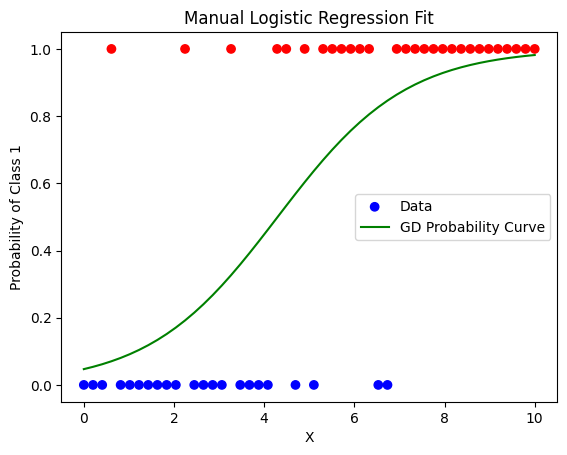

In [1]:
# ========================================
# Import Libraries
# ========================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# ========================================
# PART 1: Create Synthetic Classification Data
# ========================================
np.random.seed(0)
# Feature X
X = np.linspace(0, 10, 50).reshape(-1, 1)
# Target y (0 or 1) with a threshold and some randomness
y = (X.flatten() + np.random.normal(0, 2, 50) > 5).astype(int)

plt.scatter(X, y, c=y, cmap='bwr')
plt.title("Synthetic Binary Classification Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# ========================================
# PART 2: Fit Logistic Regression Model
# ========================================
model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:,1]  # Probability of class 1

print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Plot the probability curve
plt.scatter(X, y, c=y, cmap='bwr', label='Data')
plt.plot(X, y_prob, color='green', label='Predicted Probability')
plt.title("Logistic Regression Fit")
plt.xlabel("X")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.show()

# ========================================
# PART 3: Manual Logistic Gradient Descent (Conceptual)
# ========================================
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize
b0, b1 = 0, 0
lr = 0.1
epochs = 1000
n = len(X)

for i in range(epochs):
    z = b0 + b1*X.flatten()
    y_hat = sigmoid(z)
    # Gradients
    db0 = (1/n) * np.sum(y_hat - y)
    db1 = (1/n) * np.sum((y_hat - y) * X.flatten())
    # Update
    b0 -= lr * db0
    b1 -= lr * db1

print("Gradient Descent Logistic Result: b0 =", b0, ", b1 =", b1)

# Plot fitted probability
plt.scatter(X, y, c=y, cmap='bwr', label='Data')
plt.plot(X, sigmoid(b0 + b1*X.flatten()), color='green', label='GD Probability Curve')
plt.title("Manual Logistic Regression Fit")
plt.xlabel("X")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.show()
